This project looks into the food inspections dataset for the various food facilities in Chicago, and would predict whether the food facility passed or failed the inspection taking into account the remarks from the violations column. This project will extensively use Natural Language Processing to achieve the said result.

In [2]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The first thing to do is to read in the dataset using the Pandas' read_csv() function and naming the dataframe as 'df'.

In [3]:
#Loading the file
df = pd.read_csv('Food_Inspections.csv')

In [4]:
#Displaying the first 5 rows of the dataset
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,1583759,TRELLIS WINE BAR,TRELLIS,39120.0,Restaurant,Risk 1 (High),2426 N RACINE AVE,CHICAGO,IL,60614.0,11/02/2015,Canvass,Out of Business,NaN,41.926145,-87.658629,"(41.92614517843091, -87.65862914275179)"
1,1583758,LINKIN HOUSE,LINKIN HOUSE,1622089.0,Restaurant,Risk 1 (High),2142 N CLYBOURN AVE,CHICAGO,IL,60614.0,11/02/2015,Canvass,Out of Business,NaN,41.920080,-87.662480,"(41.920080499210265, -87.66248016891137)"
2,1448062,NORDSTROM ESPRESSO BAR,NORDSTROM ESPRESSO BAR,1245107.0,Restaurant,Risk 2 (Medium),55 E GRAND AVE,CHICAGO,IL,60611.0,11/03/2015,Canvass,Fail,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.891591,-87.625867,"(41.891590741083505, -87.62586713724458)"
3,1465247,BP,BP,2417859.0,Grocery Store,Risk 3 (Low),5133-5153 W NORTH AVE,CHICAGO,IL,60639.0,11/03/2015,License,Pass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.909405,-87.754764,"(41.909404662965976, -87.75476387362707)"
4,1465243,STARBUCKS COFFEE #7948,STARBUCKS COFFEE,2385999.0,Restaurant,Risk 2 (Medium),2730 N NARRAGANSETT AVE,CHICAGO,IL,60639.0,11/03/2015,License,Pass,NaN,41.930111,-87.785824,"(41.93011062600186, -87.78582350333859)"


Variables Description:

Inspection Id: Inspection Id

DBA Name: Name of the facility

AKA Name: Alias name

License#: License number of the facility

Facility Type: Type of the facility

Risk: Risk 1,2 or 3

Address: Address of the facility

City: City

State: State

Zip: Zip code

Inspection Date: Date of inspection

Inspection Type: Type of inspection 

Results: Result of the inspection , Pass,Fail,Pass with conditions etc

Violations: Violations remarks

Latitude: Latitude

Longitude: Longitude

Location: Location

In [5]:
# Displays the columns and the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42288 entries, 0 to 42287
Data columns (total 17 columns):
Inspection ID      42288 non-null int64
DBA Name           42288 non-null object
AKA Name           41877 non-null object
License #          42286 non-null float64
Facility Type      41989 non-null object
Risk               42273 non-null object
Address            42288 non-null object
City               42246 non-null object
State              42280 non-null object
Zip                42273 non-null float64
Inspection Date    42288 non-null object
Inspection Type    42287 non-null object
Results            42288 non-null object
Violations         34484 non-null object
Latitude           42133 non-null float64
Longitude          42133 non-null float64
Location           42133 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 5.5+ MB


In [6]:
# Replacing the spaces of columns names with an underscore and
df.columns =[x.lower().replace(' ','_') for x in df.columns]

In [7]:
df.columns

Index(['inspection_id', 'dba_name', 'aka_name', 'license_#', 'facility_type',
       'risk', 'address', 'city', 'state', 'zip', 'inspection_date',
       'inspection_type', 'results', 'violations', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [8]:
#Checking for the number of rows and columns in the dataset
df.shape

(42288, 17)

Check for the null values

In [200]:
df.isnull().sum()

inspection_id         0
dba_name              0
aka_name            411
license_#             2
facility_type         0
risk                 15
address               0
city                 42
state                 8
zip                  15
inspection_date       0
inspection_type       1
results               0
violations         7804
latitude            155
longitude           155
location            155
dtype: int64

In [202]:
df['violations'].fillna('None',inplace = True)

In [203]:
df.dropna(axis=0,inplace=True)

In [204]:
df.isnull().sum()

inspection_id      0
dba_name           0
aka_name           0
license_#          0
facility_type      0
risk               0
address            0
city               0
state              0
zip                0
inspection_date    0
inspection_type    0
results            0
violations         0
latitude           0
longitude          0
location           0
dtype: int64

Converting the Results column to binary values: pass and fail

In [192]:
df['results'].value_counts()

Pass                    24080
Fail                     8007
Pass w/ Conditions       4525
Out of Business          2949
No Entry                 2006
Not Ready                 713
Business Not Located        8
Name: results, dtype: int64

In [193]:
df['results'] = df['results'].map(lambda x: 1 if x == 'Pass' or x == 'Pass w/ Conditions' else 0)

In [194]:
df['results'].value_counts()

1    28605
0    13683
Name: results, dtype: int64

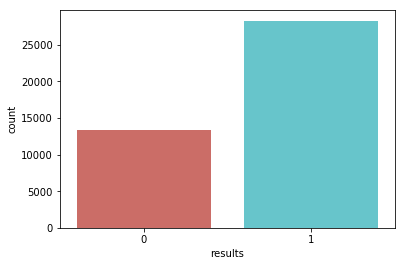

In [214]:
sns.countplot(x='results',data=df, palette='hls')

In [10]:
# Checking the values for different facilities
df['facility_type'].value_counts()

Restaurant                         29854
Grocery Store                       4913
School                              2258
Children's Services Facility         735
Bakery                               646
Daycare (2 - 6 Years)                508
Daycare Above and Under 2 Years      487
Long Term Care                       332
Catering                             252
Mobile Food Preparer                 240
Liquor                               183
Mobile Food Dispenser                142
Hospital                             136
Daycare Combo 1586                   125
Golden Diner                         123
Special Event                         49
TAVERN                                46
BANQUET HALL                          37
Shared Kitchen                        35
Mobile Prepared Food Vendor           34
GAS STATION                           31
Daycare (Under 2 Years)               29
CHARTER SCHOOL                        25
Shared Kitchen User (Long Term)       25
Wholesale       

Mapping the restaurant feature so that 1 denotes Restaurant and 0 represents any other facility

In [197]:
df['facility_type'] = df['facility_type'].map(lambda x: 1 if x == 'Restaurant' else 0)

In [198]:
df['facility_type'].value_counts()

1    29854
0    12434
Name: facility_type, dtype: int64

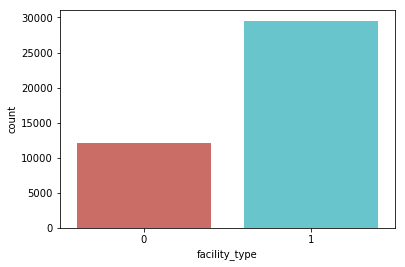

In [217]:
# Number of food inspections by facility type
sns.countplot(x='facility_type',data=df, palette='hls')

In [11]:
#Inspection types
df['inspection_type'].value_counts()

Canvass                                   23177
Canvass Re-Inspection                      5589
License                                    5310
Complaint                                  3836
Complaint Re-Inspection                    1538
License Re-Inspection                      1412
Short Form Complaint                       1150
Suspected Food Poisoning                    114
Recent Inspection                            85
Consultation                                 39
Suspected Food Poisoning Re-inspection       25
Special Events (Festivals)                    6
Tag Removal                                   3
FIRE                                          1
fire complaint                                1
Non-Inspection                                1
Name: inspection_type, dtype: int64

In [212]:
# Number of food inspection by inspection date
df['inspection_date'].value_counts()

09/13/2016    145
11/29/2016    141
09/26/2016    138
10/04/2016    134
09/09/2016    134
06/16/2016    134
09/29/2016    134
09/15/2016    133
09/08/2016    133
03/21/2017    132
09/30/2016    132
08/18/2016    132
04/05/2016    131
08/29/2016    130
09/16/2016    130
05/26/2016    130
05/03/2016    130
08/30/2016    128
08/22/2016    128
05/03/2017    126
10/25/2016    125
03/01/2016    125
06/23/2016    125
05/05/2016    125
10/05/2016    125
03/21/2016    123
11/03/2016    123
05/04/2017    123
04/07/2016    123
05/11/2017    122
             ... 
01/03/2017     24
12/07/2015     18
02/02/2016     15
07/11/2016     13
11/07/2016     12
06/10/2017     12
06/05/2017     10
05/02/2016      8
12/30/2016      8
06/06/2016      8
08/07/2017      8
07/01/2016      7
09/12/2016      6
06/24/2017      6
08/01/2016      6
10/12/2016      5
03/13/2017      4
10/03/2016      4
09/11/2017      4
08/26/2017      4
11/01/2017      4
01/04/2016      3
05/01/2017      3
02/29/2016      2
04/03/2017

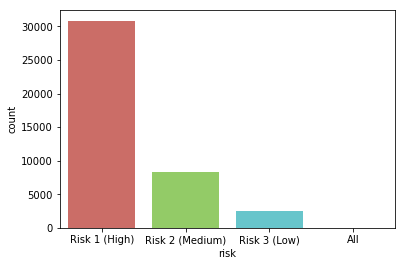

In [213]:
# Number of food inspections by risk
sns.countplot(x='risk',data = df, palette ='hls')

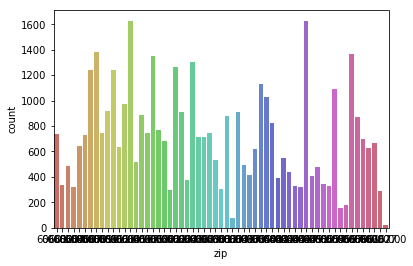

In [215]:
# Number of food inspections by zip
sns.countplot(x='zip',data = df, palette = 'hls')

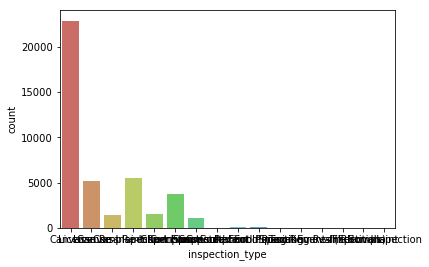

In [216]:
# Number of food inspections by inspection type
sns.countplot(x='inspection_type',data = df,palette = 'hls')

In [218]:
df['risk'].value_counts()

Risk 1 (High)      30848
Risk 2 (Medium)     8285
Risk 3 (Low)        2529
All                    7
Name: risk, dtype: int64

Transforming risk into a categorical feature having values 1,2,3

In [225]:
df["risk"] = df["risk"].astype('category')
df.dtypes

inspection_id         int64
dba_name             object
aka_name             object
license_#           float64
facility_type         int64
risk               category
address              object
city                 object
state                object
zip                 float64
inspection_date      object
inspection_type      object
results               int64
violations           object
latitude            float64
longitude           float64
location             object
dtype: object

In [227]:
df["risk_cat"] = df["risk"].cat.codes
df.head()

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,risk_cat
0,1583759,TRELLIS WINE BAR,TRELLIS,39120.0,1,Risk 1 (High),2426 N RACINE AVE,CHICAGO,IL,60614.0,11/02/2015,Canvass,0,None,41.926145,-87.658629,"(41.92614517843091, -87.65862914275179)",1
1,1583758,LINKIN HOUSE,LINKIN HOUSE,1622089.0,1,Risk 1 (High),2142 N CLYBOURN AVE,CHICAGO,IL,60614.0,11/02/2015,Canvass,0,None,41.920080,-87.662480,"(41.920080499210265, -87.66248016891137)",1
2,1448062,NORDSTROM ESPRESSO BAR,NORDSTROM ESPRESSO BAR,1245107.0,1,Risk 2 (Medium),55 E GRAND AVE,CHICAGO,IL,60611.0,11/03/2015,Canvass,0,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.891591,-87.625867,"(41.891590741083505, -87.62586713724458)",2
3,1465247,BP,BP,2417859.0,0,Risk 3 (Low),5133-5153 W NORTH AVE,CHICAGO,IL,60639.0,11/03/2015,License,1,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.909405,-87.754764,"(41.909404662965976, -87.75476387362707)",3
4,1465243,STARBUCKS COFFEE #7948,STARBUCKS COFFEE,2385999.0,1,Risk 2 (Medium),2730 N NARRAGANSETT AVE,CHICAGO,IL,60639.0,11/03/2015,License,1,None,41.930111,-87.785824,"(41.93011062600186, -87.78582350333859)",2


In [228]:
df['risk']= df['risk_cat']

In [229]:
df.head()

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,risk_cat
0,1583759,TRELLIS WINE BAR,TRELLIS,39120.0,1,1,2426 N RACINE AVE,CHICAGO,IL,60614.0,11/02/2015,Canvass,0,None,41.926145,-87.658629,"(41.92614517843091, -87.65862914275179)",1
1,1583758,LINKIN HOUSE,LINKIN HOUSE,1622089.0,1,1,2142 N CLYBOURN AVE,CHICAGO,IL,60614.0,11/02/2015,Canvass,0,None,41.920080,-87.662480,"(41.920080499210265, -87.66248016891137)",1
2,1448062,NORDSTROM ESPRESSO BAR,NORDSTROM ESPRESSO BAR,1245107.0,1,2,55 E GRAND AVE,CHICAGO,IL,60611.0,11/03/2015,Canvass,0,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.891591,-87.625867,"(41.891590741083505, -87.62586713724458)",2
3,1465247,BP,BP,2417859.0,0,3,5133-5153 W NORTH AVE,CHICAGO,IL,60639.0,11/03/2015,License,1,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.909405,-87.754764,"(41.909404662965976, -87.75476387362707)",3
4,1465243,STARBUCKS COFFEE #7948,STARBUCKS COFFEE,2385999.0,1,2,2730 N NARRAGANSETT AVE,CHICAGO,IL,60639.0,11/03/2015,License,1,None,41.930111,-87.785824,"(41.93011062600186, -87.78582350333859)",2


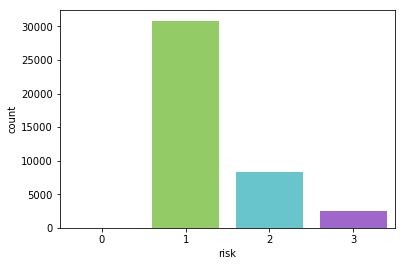

In [231]:
# Number of food inspections by risk
sns.countplot(x='risk',data = df, palette ='hls')

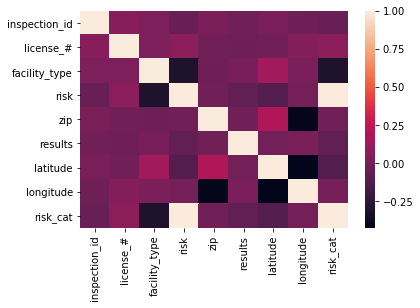

In [232]:
sns.heatmap(df.corr())